In [3]:
## @@
#  1.random imputation
#  in this notebook we will learn ...special technique
#  could even   apply imputation on  numerical as well as categotrical
#  too by "random value imputation"

## @@
## 2.technique : missing indicator

## 3.auomatic selection of parameter

## @@@
# 1. Random imputation
#  suppose we have column and there is missing values too much in mid
# to fill missing value  we use by random numbers
# it means the data  which number is there we select randomly
# and fill ...it could be apply in category as well as numerical too
# very simple technique

## @@@
# Cons : cant apply in sklean but only could do by pandas ......
# when we do filling of  missing value by  random
# then distribution does not change
#  niether variance changes ..

## @@@
# distribution  for linear and logistic regression is same but
# not for random forest
# covariance is disturbed

# @@@
#  memory heavy for deployment , as we ned to store
#  the orginal training set
#  To extract values from and replace the NA in coming observation
 #"suppose we have deployed the data in the server"
  # " new data  is coming from the outside in the server"
  # and there is missing age index in age columns and  we have to
  # impute" then we replace the missing index by the training value
  # so by this we have to keep all the training data age value in the
  # server to fill instant missing value of new age column
  # by generating the random age value from training age data set ""
  # problem is that if traing data is very huge  then it will
  # consume the memory at server

   ## Suppose we have 20 missing values out of 100
   # then we pick random 20 values from 80 values non misisng then we
    ## fill these 20 value bin 20 missing values

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
v = pd.read_csv('/content/train (2).csv' , usecols = ['Age'  , 'Fare' , 'Survived'])

In [5]:
v.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [6]:
x = v.drop(columns = ['Survived'])
y = v['Survived']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2 , random_state = 2)

# we mentioned random state just to freeze the train test split
# data ....value we assigned ..is just formality ...means we could assign
# any value ...in random state

In [8]:
# "Create a new column in x_train named 'Age_imputed', and
# assign it the same values  as the 'Age' column."

x_train['Age_imputed'] = x_train['Age']

x_test['Age_imputed'] = x_test['Age']

#  3. For better transparency and debugging
#  By keeping both columns (Age and Age_imputed), you can:

#  Compare original and filled values

# Visualize what changed

# Easily go back to raw values if needed

In [9]:
x_train

#   here we  could see that
#   there is new column which is of age_imputed

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [10]:
x_test
# here  could see that
# there is new column which is of age_imputed

,Age,Fare,Age_imputed
707,42.0,26.2875,42.0
37,21.0,8.0500,21.0
615,24.0,65.0000,24.0
169,28.0,56.4958,28.0
68,17.0,7.9250,17.0
...,...,...,...
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0


In [18]:
# Step 1: Count how many values are missing in Age_imputed
num_missing = x_train['Age_imputed'].isnull().sum()

# Step 2: Create a list of random values from Age (excluding NaN)
random_ages = x_train['Age'].dropna().sample(num_missing, replace=True).values

# Step 3: Find the indexes where Age_imputed is missing
missing_indexes = x_train[x_train['Age_imputed'].isnull()].index
## here two times of x_train because at first we would see whole dataframe
## by x_train ..then in x_trian we choose age imputed ...
## do chatgpt if u forgets the concept


#@#$@$3 important line here by this code we are actually filling the missing
# values
# Step 4: Fill those missing places with the random values
x_train.loc[missing_indexes, 'Age_imputed'] = random_ages
#.loc is used to set values in specific rows and columns
# based on index labels.
# Here, it updates the 'Age_imputed' column only at missing_indexes
# with random_ages. ✅


In [19]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,28.0
493,71.0,49.5042,71.0
527,NaN,221.7792,65.0


/tmp/ipython-input-20-2700382323.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label ='Original')
/tmp/ipython-input-20-2700382323.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age_imputed'],label = 'Imputed')


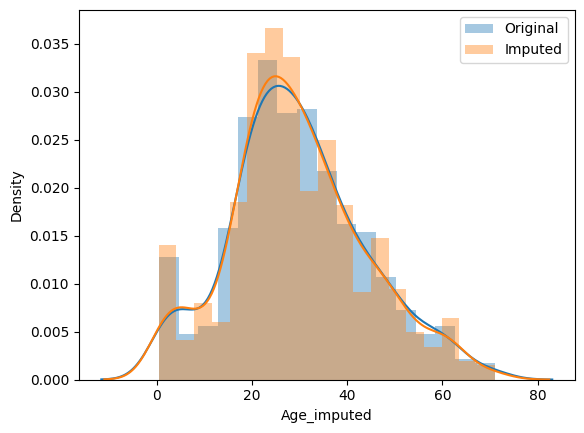

In [20]:
sns.distplot(x_train['Age'],label ='Original')
sns.distplot(x_train['Age_imputed'],label = 'Imputed')
plt.legend()
plt.show()

##  x_train['Age']
# This is the original Age column,
# which may still contain missing (NaN) values.


##  x_train['Age_imputed']
# This is the column where the missing values have been filled
# using random sampling from the existing (non-missing) Age values.

## almost same distribution

In [14]:
print('original variable variance:' , x_train['Age'].var())
print('variance after random  imputation:' , x_train['Age_imputed'].var())

#  variance too not much changed

original variable variance: 204.3495133904614
variance after random  imputation: 201.48529190410724


In [15]:
x_train[['Fare' , 'Age' , 'Age_imputed']].cov()
# covariance is quite changed unlike variance


,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,69.149800
Age,71.512440,204.349513,204.349513
Age_imputed,69.149800,204.349513,201.485292


<Axes: >

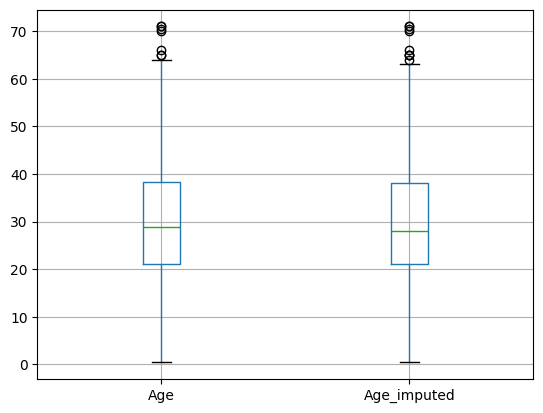

In [16]:
x_train[['Age' , 'Age_imputed']].boxplot()

## outliers are not effected ....even after filling by random numbers


In [17]:
observation = x_train.iloc[0]   # first row
sampled_value = x_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

##  in production technique ... if we are giving fare value as input
# then we should get fare output for same input
# but if are giving input aagain if fare same value then
# output gerts changes and keep giving others age value as output
 # to stablise it we use upper codes ...basicaly this happens in production